In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers - Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,21.0,15.0,81
2,3,Female,20.0,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
CustomerID                0
Gender                    1
Age                       1
Annual Income (k$)        1
Spending Score (1-100)    0
dtype: int64


In [5]:
numerical = list(df.select_dtypes(include=['int64', 'float64']).columns)

categorical = list(df.select_dtypes(include=['object', 'category']).columns)

In [6]:
# Replace missing values in numerical columns with mean
for column in numerical:
    df[column].fillna(df[column].mean(), inplace=True)

# Replace missing values in categorical columns with mode
for column in categorical:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [7]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


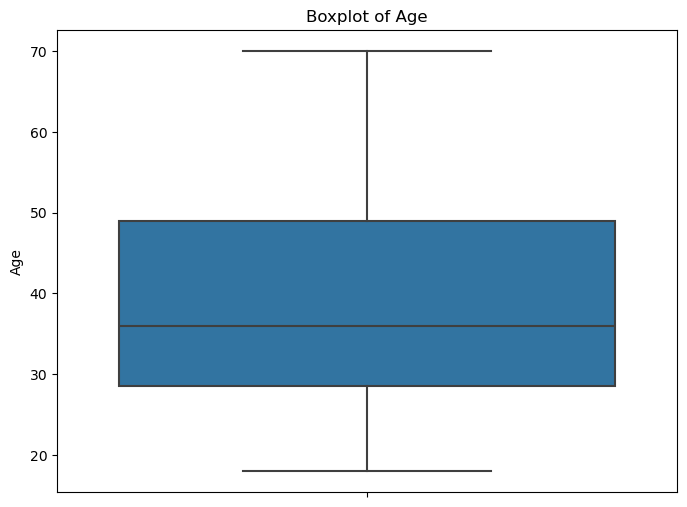

In [8]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, y='Age')
plt.title('Boxplot of Age')
plt.ylabel('Age')

# Show the plot
plt.show()

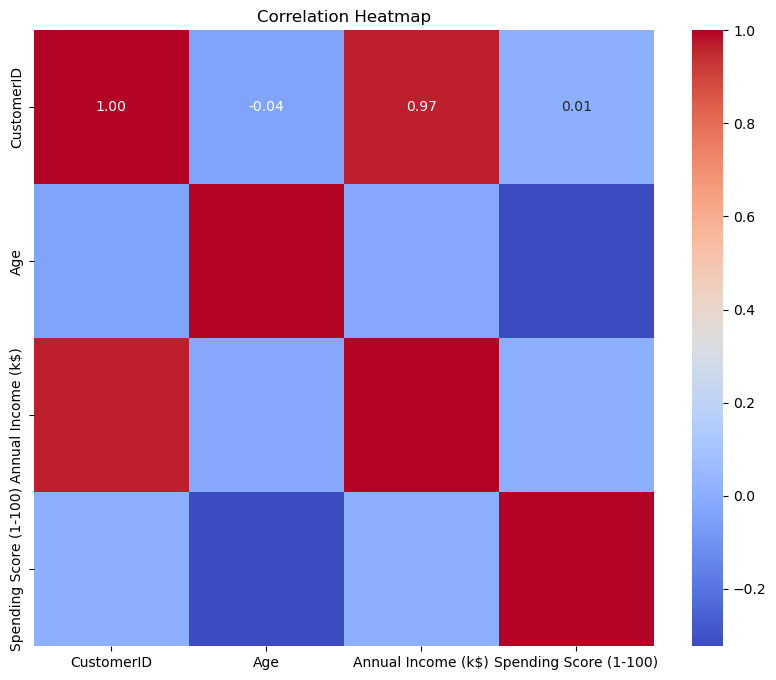

In [9]:
#only numerical columns
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


#Age HAS THE MOST CORRELATION WITH Spending Score (1-100)

C:\Users\Z\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Z\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Z\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Z\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

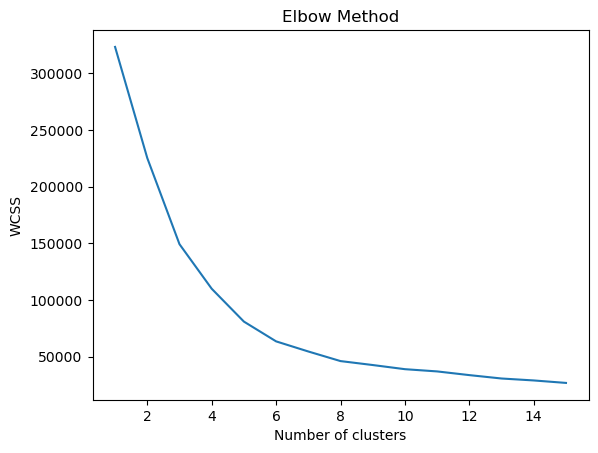

In [18]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#Elbow Method graph
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
best_k_elbow = wcss.index(min(wcss))

#this is the best but not necessarily the most optimal wrt cost
best_k_elbow

14

In [11]:
average_annual_income = df['Annual Income (k$)'].mean()

print("Average Annual Income:", average_annual_income)

Average Annual Income: 61.31683168316832


In [22]:
male_customers = df[df['Gender'] == 'Male']

average_spending_score_male = male_customers['Spending Score (1-100)'].mean()

print("Average Spending Score of Male Customers:", average_spending_score_male)

Average Spending Score of Male Customers: 48.17977528089887


In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)

#assigning clusters to each point
df['Cluster'] = kmeans.labels_

#average income and spending score for each cluster
cluster_summary = df.groupby('Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})

highest_income_cluster = cluster_summary[cluster_summary['Annual Income (k$)'] == cluster_summary['Annual Income (k$)'].max()]

highest_spending_score_cluster = cluster_summary[cluster_summary['Spending Score (1-100)'] == cluster_summary['Spending Score (1-100)'].max()]

print("Cluster with Highest Average Income:")
print(highest_income_cluster, '\n')

print("Cluster with Highest Average Spending Score:")
print(highest_spending_score_cluster)

C:\Users\Z\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Z\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster with Highest Average Income:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
2                 89.555556               17.166667 

Cluster with Highest Average Spending Score:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
1                      87.8                   82.15


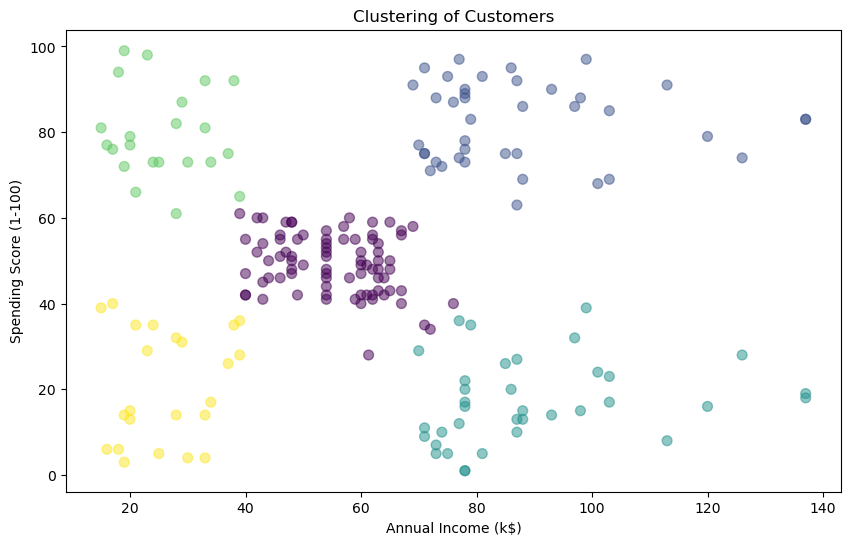

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.5)
plt.title('Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()

In [36]:
customers = []

#we have 5 clusters
for cluster_label in range(5):
    #including only CustomerIDs from the particular cluster
    cluster_customers = df[df['Cluster'] == cluster_label]['CustomerID']

    customers.append(cluster_customers)
    
    print(f"\nCustomers in Cluster {cluster_label}:")
    print(cluster_customers)


Customers in Cluster 0:
43      44
46      47
47      48
48      49
49      50
      ... 
122    123
126    127
132    133
142    143
200    201
Name: CustomerID, Length: 82, dtype: int64

Customers in Cluster 1:
123    124
125    126
127    128
129    130
131    132
133    134
135    136
137    138
139    140
141    142
143    144
145    146
147    148
149    150
151    152
153    154
155    156
157    158
159    160
161    162
163    164
165    166
167    168
169    170
171    172
173    174
175    176
177    178
179    180
181    182
183    184
185    186
187    188
189    190
191    192
193    194
195    196
197    198
199    200
202    203
Name: CustomerID, dtype: int64

Customers in Cluster 2:
124    125
128    129
130    131
134    135
136    137
138    139
140    141
144    145
146    147
148    149
150    151
152    153
154    155
156    157
158    159
160    161
162    163
164    165
166    167
168    169
170    171
172    173
174    175
176    177
178    179
180    181
182 

In [40]:
total_customers = df['CustomerID'].sum()

cluster1_customers_count = customers[0].sum()

percentage = (cluster1_customers_count / total_customers) * 100

print(percentage, '\n')

34.73872307543707 



In [46]:
cluster2 = df[df['Cluster'] == 2]

print("Mode of Age for Cluster 2:\n", cluster2['Age'].mode())

Mode of Age for Cluster 2:
 0    34.0
1    47.0
Name: Age, dtype: float64


In [50]:
avg_income_cluster_3 = cluster_summary['Annual Income (k$)'][2]

print("Average Income for Cluster 3:\n", avg_income_cluster_3)

Average Income for Cluster 3:
 89.55555555555556


In [51]:
cluster_counts = df['Cluster'].value_counts()

print("Count of values in each cluster:")
print(cluster_counts)

Count of values in each cluster:
Cluster
0    82
1    40
2    36
4    23
3    22
Name: count, dtype: int64
